# Python Assignment 6

⏱⏱⏱**Due: 12/01/2024 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is alway positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


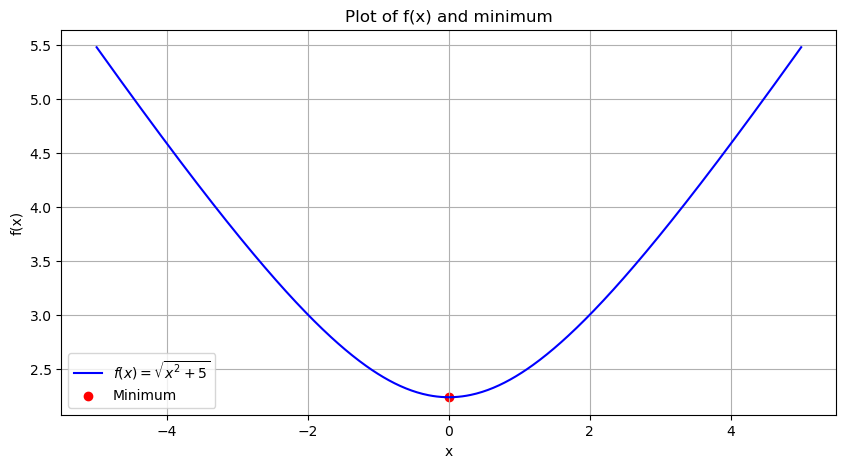

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x)
def f(x):
    return np.sqrt(x**2 + 5)

# x and y values of the function f(x) over the interval [-5, 5]
x_values = np.linspace(-5, 5, 500)
y_values = f(x_vals)

# Minimum point
x_min = 0
y_min = f(x_min)

# Plot the function f(x) and its minimum point
plt.figure(figsize=(10, 5))
plt.plot(x_values, y_values, label=r'$f(x) = \sqrt{x^2 + 5}$', color="blue")
plt.scatter(x_min, y_min, color="red", label="Minimum")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Plot of f(x) and minimum")
plt.legend()
plt.grid()
plt.show()

In [6]:
# Define the derivative of the function f(x), for gradient descent
def f_prime(x):
    return x / np.sqrt(x**2 + 5)

# Function to perform gradient descent
def gradient_descent(x_0, step_size, num_iterations):
    x_k = [x_0]
    for _ in range(num_iterations):
        gradient = f_prime(x_k[-1])
        new_x = x_k[-1] - step_size * gradient
        x_k.append(new_x)

    # Return an array of x_k values
    return np.array(x_k)


# Set up initial values 
x_0 = 0 / 5 + 1    # Initial guess based on last digit of SBU ID (my last digit is 0)
T = 50             # Number of iterations
alpha = 1          # Step size

# Run gradient descent by calling the function
x_k = gradient_descent(x_0, alpha, T)

# Report x_T by printing out the last value in the x_k array
x_T = x_k[-1]
print(f"x_T value is: {x_T}")


x_T value is: 1.4949947209933747e-13


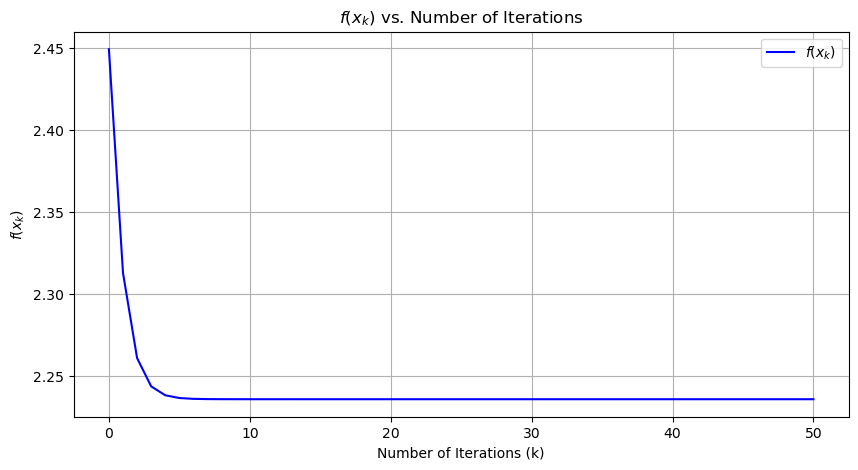

In [8]:
# Plot f(x_k) vs. iteration number
fxk_x_values = range(len(f_vals))
fxk_y_values = f(x_k)

plt.figure(figsize=(10, 5))
plt.plot(fxk_x_values, fxk_y_values, label=r'$f(x_k)$', color="blue")
plt.xlabel("Number of Iterations (k)")
plt.ylabel(r'$f(x_k)$')
plt.title(r'$f(x_k)$ vs. Number of Iterations')
plt.legend()
plt.grid()
plt.show()

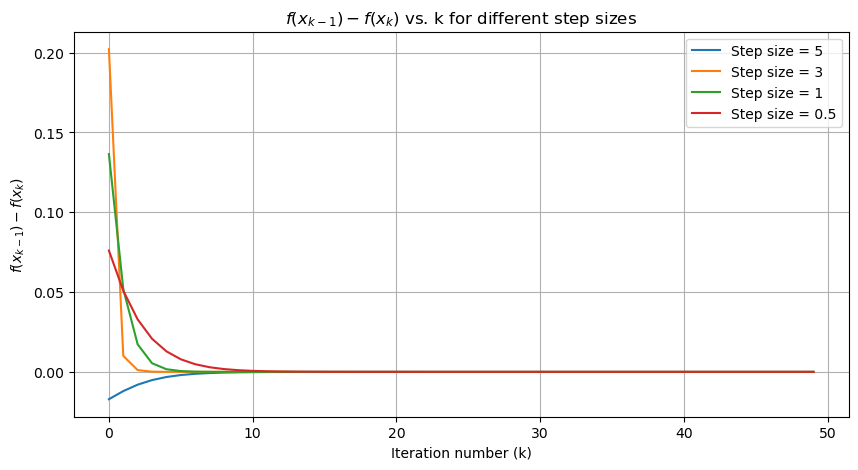

For step size 5, is f(x_(k-1)) - f(x_k) always positive? False
For step size 3, is f(x_(k-1)) - f(x_k) always positive? False
For step size 1, is f(x_(k-1)) - f(x_k) always positive? False
For step size 0.5, is f(x_(k-1)) - f(x_k) always positive? True


In [9]:
# Create a list containing step sizes
step_sizes = [5, 3, 1, 0.5]

# Initialize a list to store the results from different step sizes
results = {}

# Initialize an empty graph
plt.figure(figsize=(10, 5))

# loop through the step sizes, perform GD, and record results
for alpha in step_sizes:
    x_k_steps = gradient_descent(x_0, alpha, T) # Perform GD for the specified step size
    f_diff = f(x_k_steps[:-1]) - f(x_k_steps[1:]) # Calculate difference of f(x_(k-1) - f(x_k) for all iterations k
    results[alpha] = f_diff
    plt.plot(range(len(f_diff)), f_diff, label=f"Step size = {alpha}") # Plot the differences vs. iterations (on the same graph)


# Design the graph
plt.xlabel("Iteration number (k)")
plt.ylabel(r'$f(x_{k-1}) - f(x_k)$')
plt.title(r'$f(x_{k-1}) - f(x_k)$ vs. k for different step sizes')
plt.legend()
plt.grid()
plt.show()

# Check if f(x_(k-1)) - f(x_k) is always positive
for alpha, f_diff in results.items():
    check_positive = np.all(f_diff > 0)
    print(f"For step size {alpha}, is f(x_(k-1)) - f(x_k) always positive? {check_positive}")

## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



Intercept: 4.263233675092136
Coefficients: [3.90279022 0.32054445]


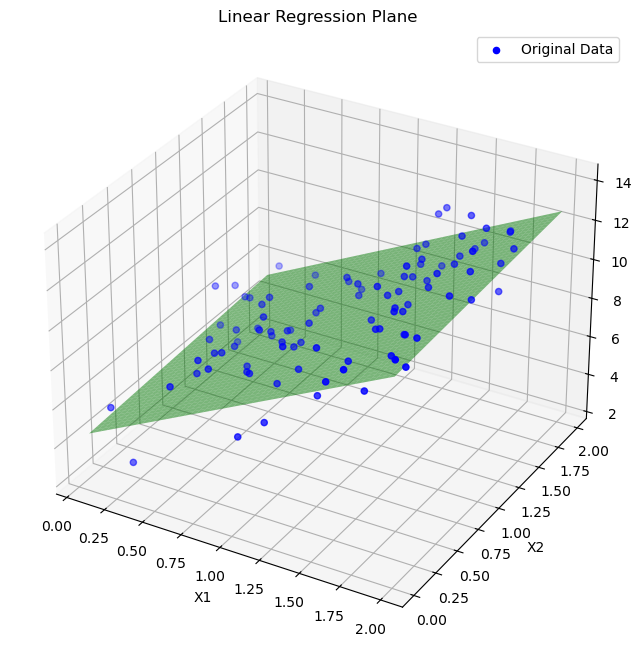

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # For 3D plotting

# Generate synthetic data
np.random.seed(20)  # Use the seed 20 based on the last two digits of my SBU ID
X = 2 * np.random.rand(100, 2)  # Generate 100 random 2D data points
y = 4 + 4 * X[:, 0] + 0.5 * X[:, 1] + np.random.randn(100)  # Generate y values with noise

# Add a column of ones to X for the bias terms (intercept) in the normal equation
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Find theta using the normal equation
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

# Print the intercept and coefficients of the regression plane
bias = theta_best[0]
weights = theta_best[1:]
print(f"Intercept: {bias}")
print(f"Coefficients: {weights}")

# Initialize the plot for the generated data and the regression plane
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of generated data
ax.scatter(X[:, 0], X[:, 1], y, color='blue', label='Original Data')

# Grid for the regression plane
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 50)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 50)
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
y_pred = bias + weights[0] * x1_grid + weights[1] * x2_grid

# Plot the regression plane
ax.plot_surface(x1_grid, x2_grid, y_pred, alpha=0.5, color='green')

# Design the graph
ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
plt.title("Linear Regression Plane")
plt.legend()
plt.show()

## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. You task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function to map inputs to probability score in (0, 1) range 
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate synthetic data
np.random.seed(595)
X = np.random.rand(2, 100)      # 2 features, 100 samples
w_true = np.array([1.5, -2.5])  # True weights
b_true = 1.0                    # True bias

# Generate binary labels based on true weights and sigmoid probabilities
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)

# Convert probabilities to binary data (0 or 1)
Y = (probabilities > 0.5).astype(int)

# Add noise to features for better generalization
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

# Split data into training set (80%) and test set (20%)
X_train, X_test = X[:,:80], X[:,80:]
Y_train, Y_test = Y[:80], Y[80:]

# Initialize parameters for logistic regression
w = np.zeros(X.shape[0])  # Set weights to zero
b = 0.0                   # Set bias to zero

# Gradually adjust the following parameters: 
# Decrease learning_rate value that allows rapid convergence without overshooting or instability
learning_rate = 0.25

# Increase number of training iterations needed until loss stabilizes and the weights stop changing significantly
num_epochs = 2000

# Function to perform binary cross-entropy loss
def compute_loss(A, Y):
    m = Y.shape[0]  # Number of samples
    # Clip A to avoid log(0) which can cause numerical instability
    A = np.clip(A, 1e-10, 1 - 1e-10)
    loss = -np.mean(Y * np.log(A) + (1 - Y) * np.log(1 - A))
    return loss

# Initialize array to hold losses
losses = []

# Gradient descent to optimize weights and bias
for epoch in range(num_epochs):
    # Compute predictions using current weights and bias
    A_train = sigmoid(np.dot(w.T, X_train) + b)

    # Compute and store the amount of loss
    loss = compute_loss(A_train, Y_train)
    losses.append(loss)

    # Compute gradients of the cost function with respect to weights and bias:
    # Gradient for weights
    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)
    # Gradient for bias
    dJdb = np.mean(A_train - Y_train)

    # Update weights and bias
    w -= learning_rate * dJdw
    b -= learning_rate * dJdb
        
    
# Final predictions for training set
A_train_final = sigmoid(np.dot(w.T, X_train) + b)
predictions_train = (A_train_final > 0.5).astype(int) # Binary prediction

# Final predictions for test set
A_test_final = sigmoid(np.dot(w.T, X_test) + b)
predictions_test = (A_test_final > 0.5).astype(int)
    

# Calculate and display training and test accuracies
train_accuracy = np.mean(predictions_train == Y_train)
test_accuracy = np.mean(predictions_test == Y_test)
print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")


Training Set Accuracy: 0.90
Test Set Accuracy: 0.95


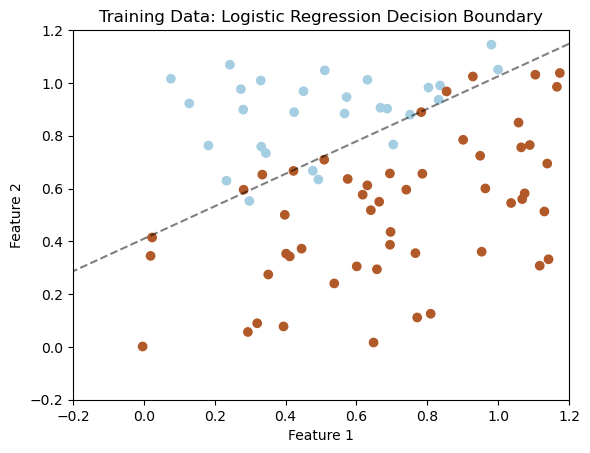

In [9]:
# Plot training data points
plt.scatter(X[0, :80], X[1,:80], c=Y[:80], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

# Get the current axis limits for plotting
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid of points (xx, yy) to evaluate the decision boundary
xx, yy = np.meshgrid(
    np.linspace(xlim[0], xlim[1], 50),  # 50 points along the x-axis
    np.linspace(ylim[0], ylim[1], 50)   # 50 points along the y-axis
)

# Compute the decision boundary values (Z)
# Flatten the grid points and calculate Z = w.T * X + b
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b

# Apply the sigmoid function to map Z to probabilities
Z = sigmoid(Z)

# Reshape Z back into the shape of the grid (xx, yy) for plotting
Z = Z.reshape(xx.shape)

# Plot decision boundary for training data
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Training Data: Logistic Regression Decision Boundary')
plt.show()

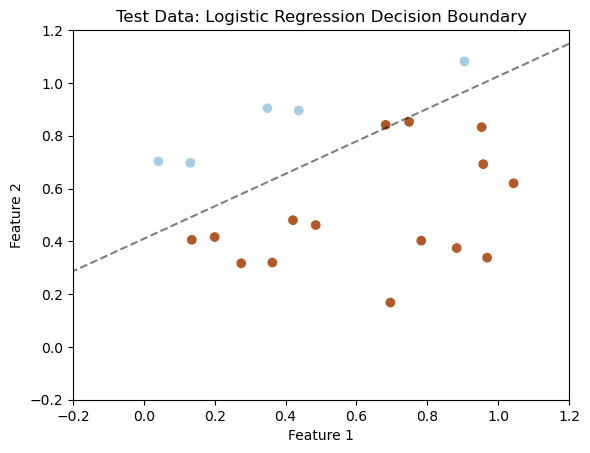

In [10]:
# Plot test data points
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

# Get the current axis limits for plotting
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid of points (xx, yy) to evaluate the decision boundary
xx, yy = np.meshgrid(
    np.linspace(xlim[0], xlim[1], 50),  # 50 points along the x-axis
    np.linspace(ylim[0], ylim[1], 50)   # 50 points along the y-axis
)


# Compute the decision boundary values (Z)
# Flatten the grid points and calculate Z = w.T * X + b
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b

# Apply the sigmoid function to map Z to probabilities
Z = sigmoid(Z)

# Reshape Z back into the shape of the grid (xx, yy) for plotting
Z = Z.reshape(xx.shape)

# Plot decision boundary for test data
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Test Data: Logistic Regression Decision Boundary')
plt.show()